# QUESTION_1

* STEP_1 : SMOOTHENING OF IMAGE WITH GAUSSIAN FILTER

In [1]:
import cv2 as CV
import numpy as NP
import matplotlib.pyplot as PL

In [26]:
X = CV.imread('fig5.jpg')


(-0.5, 559.5, 419.5, -0.5)

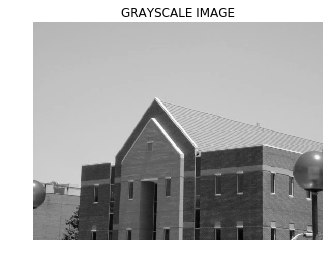

In [27]:
X_1 = CV.cvtColor(X,CV.COLOR_BGR2GRAY)
PL.figure(1)
PL.imshow(X_1,'gray')
PL.title('GRAYSCALE IMAGE')
PL.axis('off')

In [28]:

I_BLUR = CV.GaussianBlur(X_1,(3,3),0)
#EDGE = I_BLUR

(-0.5, 559.5, 419.5, -0.5)

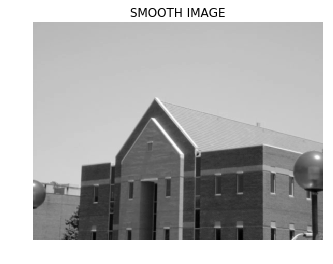

In [29]:
PL.figure(2)
PL.imshow(I_BLUR,'gray')
PL.title('SMOOTH IMAGE')
PL.axis('off')

In [30]:
X1_EDGE = CV.Sobel(I_BLUR,CV.CV_64F,1,0,9)  #....for HORIZONTAL ED
Y1_EDGE = CV.Sobel(I_BLUR,CV.CV_64F,0,1,9)


In [31]:
def conv(IM,K):
    #......CREATING MATRIX OF ALL ZEROS FOR ZERO PADDIN
    Z_H = NP.zeros((IM.shape[0]+2,IM.shape[1]+2))
    Z_V = NP.zeros((IM.shape[0]+2,IM.shape[1]+2))
    F = NP.zeros((IM.shape[0]+2,IM.shape[1]+2))
    
    
    #......PADDING ZEROS
    Z_H[1:Z_H.shape[0]-1,1:Z_H.shape[1]-1] = IM
    Z_V[1:Z_V.shape[0]-1,1:Z_V.shape[1]-1] = IM
    
    # FOLLOWING IS THE LOOP FOR PERFROMING CONVOLUTION OF 3X3 SOBEL OPERTOR KERNEL WITH ALL 3X3 CELL OF AN IMAGE
    
    for i in range(0,Z_H.shape[0]-2):
        for j in range(0,Z_H.shape[1]-2):
            Z_H[i,j]=NP.abs(sum(sum(Z_H[i:i+3,j:j+3]*K)))  #....HORIZANTAL EDGE IMAGE
            Z_V[i,j]=NP.abs(sum(sum(Z_V[i:i+3,j:j+3]*K.T))) #....VERTICAL EDGE IMAGE
            F[i,j] = Z_H[i,j]**2 + Z_V[i,j]**2 
            
    print(min(list(Z_H.ravel())))
    print(max(list(Z_H.ravel())))
    print(min(list(Z_V.ravel())))
    print(max(list(Z_V.ravel())))
    F = NP.sqrt(F) #.....MAGNITUDE EDGE OF GIVEN IMAGE
    
    #....DISPLAYING RESULT
    OUTPUT_X = NP.zeros((IM.shape[0],IM.shape[1]))
    OUTPUT_X = Z_H[1:Z_H.shape[0]-1,1:Z_H.shape[1]-1]
    OUTPUT_Y = NP.zeros((IM.shape[0],IM.shape[1]))
    OUTPUT_Y = Z_V[1:Z_V.shape[0]-1,1:Z_V.shape[1]-1]
    
    # PL.figure(1)
    PL.subplot(211)
    PL.imshow(OUTPUT_X,'gray')
    PL.title('HORIZONTAL EDGE')
    PL.axis('off')
    #PL.figure(2)
    PL.subplot(212)
    PL.imshow(OUTPUT_Y,'gray')
    PL.title('VERTICAL EDGE')
    PL.axis('off')
    #PL.figure(3)
    #PL.imshow(F,'gray')
    #PL.title('EDGE DETECTION BY TAKING MAGNITUDE')
    #PL.axis('off')
    #print(IM.shape)
    return OUTPUT_X,OUTPUT_Y

0.0
887.0
0.0
976.0


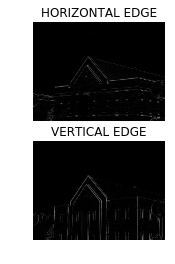

In [32]:
S = NP.array([[-1,-2,-1],[0,0,0],[1,2,1]])
PL.figure(3)
X_EDGE,Y_EDGE = conv(I_BLUR,S)


(-0.5, 559.5, 419.5, -0.5)

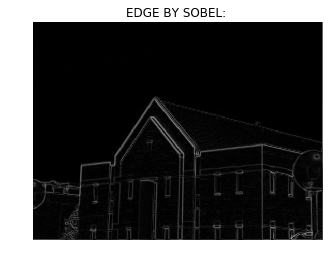

In [33]:

EDGE = X_EDGE + Y_EDGE
PL.figure(4)
PL.imshow(EDGE,'gray')
PL.title('EDGE BY SOBEL: ')
PL.axis('off')




In [34]:
ANGLE = NP.zeros((EDGE.shape[0],EDGE.shape[1]))
for i in range(0,EDGE.shape[0]):
    for j in range(0,EDGE.shape[1]):
        ANGLE[i,j] = int(NP.degrees(NP.arctan2(Y1_EDGE[i,j],X1_EDGE[i,j])))
        if (-20<=ANGLE[i,j]<=20)  or (-180<=ANGLE[i,j]<=-160) or (160<=ANGLE[i,j]<=180):
            ANGLE[i,j] = 0
        if (21<=ANGLE[i,j]<=61) or (-159<=ANGLE[i,j]<=-115) :
            ANGLE[i,j] = 45
        if (62<=ANGLE[i,j]<=114) or (-114<=ANGLE[i,j]<=-61) :
            ANGLE[i,j] = 90 
        if (115<=ANGLE[i,j]<=159) or (-62<=ANGLE[i,j]<=-19) :
            ANGLE[i,j] = 135  

In [35]:
print(min(list(ANGLE.ravel())))
print(max(list(ANGLE.ravel())))
ANGLE.dtype



R = NP.where(ANGLE == 135)
len(R[0])

0.0
135.0


23592

In [36]:
I =NP.zeros((EDGE.shape[0]+2,EDGE.shape[1]+2))
I[1:I.shape[0]-1,1:I.shape[1]-1] = EDGE
for i in range(0,EDGE.shape[0]):
    for j in range(0,EDGE.shape[1]):
        r = i+1
        c = j+1
        if int(ANGLE[i,j]) == 0:
            if (I[r,c] < I[r,c+1]) or (I[r,c] < I[r,c-1] ):
                EDGE[i,j] = 0
            elif (I[r,c] >= I[r,c+1]) and (I[r,c] >=I[r,c-1] ):
                EDGE[i,j] = EDGE[i,j]
        if int(ANGLE[i,j]) == 45:
            if (I[r,c] < I[r-1,c+1]) or (I[r,c] < I[r+1,c-1] ):
                EDGE[i,j] = 0
            elif (I[r,c] >= I[r-1,c+1]) and (I[r,c] >= I[r+1,c-1] ):
                EDGE[i,j] = EDGE[i,j]  
        if int(ANGLE[i,j]) == 90:
            if (I[r,c] <I[r+1,c]) or (I[r,c] < I[r-1,c] ):
                EDGE[i,j] = 0
            elif (I[r,c] >= I[r+1,c]) and (I[r,c] >= I[r-1,c] ):
                EDGE[i,j] = EDGE[i,j] 
        if int(ANGLE[i,j]) == 135:
            if (I[r,c] < I[r+1,c+1]) or (I[r,c] < I[r-1,c-1] ):
                EDGE[i,j] = 0
            elif (I[r,c] >= I[r+1,c+1]) and (I[r,c] >= I[r-1,c-1] ):
                EDGE[i,j] = EDGE[i,j]    

(-0.5, 559.5, 419.5, -0.5)

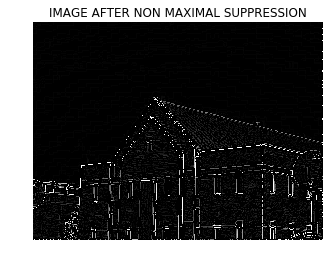

In [37]:

EDGE  =  CV.convertScaleAbs(EDGE)
#NP.max(EDGE)
PL.figure(5)
PL.imshow(EDGE,'gray')
PL.title('IMAGE AFTER NON MAXIMAL SUPPRESSION')
PL.axis('off')

In [38]:

for i in range(0,EDGE.shape[0]):
    for j in range(0,EDGE.shape[1]):
        if EDGE[i,j] >=int(0.5*NP.max(EDGE)):
            EDGE[i,j] = 2
        elif int(0.25*NP.max(EDGE))<=EDGE[i,j]<int(0.5*NP.max(EDGE)):
            EDGE[i,j] = 1
        else:
            EDGE[i,j] =0
            

In [39]:

I = NP.zeros((EDGE.shape[0]+2,EDGE.shape[1]+2))
I[1:EDGE.shape[0]+1,1:EDGE.shape[1]+1] = EDGE
NEW = NP.zeros((EDGE.shape[0]+2,EDGE.shape[1]+2))
for i in range(0,EDGE.shape[0]):
    for j in range(0,EDGE.shape[1]):
        r1 = i+1
        c1 = j+1
        if EDGE[i,j] == 1:
            if NEW[i,j] == 2:
                NEW[i,j] = 2
        elif EDGE[i,j] == 2:
            if (NP.abs(I[r1,c1] - I[r1-1,c1]) == 1)  or (NP.abs(I[r1,c1] - I[r1-1,c1])== 0)  :
                NEW[r1-1,c1] = 2
            if (NP.abs(I[r1,c1] - I[r1+1,c1]) == 1)  or (NP.abs(I[r1,c1] - I[r1+1,c1]) == 0)  :
                NEW[r1+1,c1] = 2
            if (NP.abs(I[r1,c1] - I[r1,c1+1]) == 1)  or (NP.abs(I[r1,c1] - I[r1,c1+1]) == 0)  :
                NEW[r1,c1+1] = 2
            if (NP.abs(I[r1,c1] - I[r1,c1-1]) == 1)  or (NP.abs(I[r1,c1] - I[r1,c1-1]) == 0)  :
                NEW[r1,c1-1] = 2
            if (NP.abs(I[r1,c1] - I[r1-1,c1-1]) == 1)  or (NP.abs(I[r1,c1] - I[r1-1,c1-1]) == 0)  :
                NEW[r1-1,c1-1] = 2
            if (NP.abs(I[r1,c1] - I[r1+1,c1+1]) == 1)  or (NP.abs(I[r1,c1] - I[r1+1,c1+1]) == 0)  :
                NEW[r1+1,c1+1] = 2


(-0.5, 557.5, 417.5, -0.5)

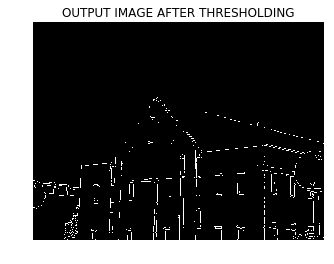

In [40]:

OUTPUT = NP.zeros((EDGE.shape[0],EDGE.shape[1]))
OUTPUT = NEW[1:EDGE.shape[0]-1,1:EDGE.shape[1]-1]
#PL.figure(1)
#PL.imshow(NEW,'gray')
PL.figure(6)
PL.imshow(OUTPUT,'gray')
PL.title('OUTPUT IMAGE AFTER THRESHOLDING')
PL.axis('off')



# 